# Load Library

In [1]:
#!/bin/python3
import ctypes
from ctypes import *
import numpy as np
import time
import cv2 as cv
from matplotlib import pyplot as plt
from pyqhyccd import *
qhyccd = CDLL('/usr/local/lib/libqhyccd.so')
qhyccd.GetQHYCCDParam.restype=c_double
qhyccd.OpenQHYCCD.restype=ctypes.POINTER(c_uint32)
# ref: https://www.qhyccd.com/bbs/index.php?topic=6356.0
# H.F. @20191115

In [2]:
ret = -1
qhyccd.InitQHYCCDResource()
qhyccd.ScanQHYCCD()
type_char_array_32 = c_char*32
id=type_char_array_32()
qhyccd.GetQHYCCDId(c_int(0), id)    # open the first camera
print(id.value)
cam = qhyccd.OpenQHYCCD(id)
qhyccd.SetQHYCCDStreamMode(cam, 0)  # 0 for single frame
qhyccd.InitQHYCCD(cam)

b'QHY163M-8cf4dc43a8fe4f8f'


0

In [4]:
# Get Camera Parameters
chipw = c_double()
chiph = c_double()
w = c_uint()
h = c_uint()
pixelw = c_double()
pixelh = c_double() 
bpp = c_uint()
channels = c_uint32(1)
qhyccd.GetQHYCCDChipInfo(cam, byref(chipw), byref(chiph), byref(w), byref(h),
                         byref(pixelw), byref(pixelh), byref(bpp))

0

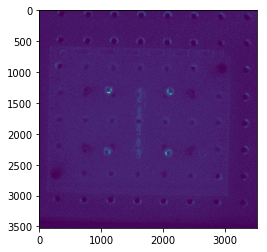

In [6]:
roi_w = c_uint(3522)
roi_h = c_uint(3522)

imgdata = (ctypes.c_uint16 * roi_h.value * roi_w.value)()
qhyccd.SetQHYCCDResolution(cam, 566, 0, roi_w, roi_h)
qhyccd.SetQHYCCDParam(cam, CONTROL_ID.CONTROL_EXPOSURE, c_double(40000)) # unit: us
#qhyccd.SetQHYCCDParam(cam, CONTROL_ID.)

ret = qhyccd.ExpQHYCCDSingleFrame(cam)
ret = qhyccd.GetQHYCCDSingleFrame(
    cam, byref(roi_w), byref(roi_h), byref(bpp), byref(channels), imgdata)
x = np.asarray(imgdata)
plt.imshow(x.reshape([roi_h.value, roi_w.value]))